# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [168]:
%matplotlib inline
# Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [99]:
# OpenWeatherMap.org URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

In [162]:
# Create settings dictionary with information we're interested in
settings = {"units": "metric", "appid": api_key}
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

# Initializing variables
cities_weather = []
city_num = 1
api_set = 1

# Lists for DataFrame
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [163]:
# Variables for setting up API call set
api_set_size = 51 # Number is one more than total desired
sleep = 65

# Perform OpenWeatherMap.org API calls for each city in cities
print('Beginning Data Retrieval')
print('------------------------------')

for city in cities:
    if city_num < api_set_size:
        try:
            # Get current weather
            response = owm.get_current(city, **settings)
#             response = requests.get(query_url + city).json()
            
            print(f'Processing Record {city_num} of Set {api_set} | {city}')

            # Append needed information to related list
            city_name.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])
        except:
            print("City not found. Skipping...")
        
        city_num += 1
    else:
        city_num = 1
        api_set += 1
        print(time.strftime("%I:%M:%S") + f' *** Sleep for {sleep} seconds because API calls-per-minute limit ***')
        time.sleep(sleep)
    
print('-------------------------------')
print('Data Retrieval Complete')
print('-------------------------------')

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | altay
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | praia da vitoria
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | cyangugu
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | sungaipenuh
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | inirida
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | luba
Processing Record 16 of Set 1 | norman wells
City not found. Skipping...
Processing Record 18 of Set 1 | waingapu
Processing Record 19 of Set 1 | pandaria
Processing Record 20 of Set 1 | pisco
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | balkanabat
Processing Record 23 of Set 1 | barrow
Processing

City not found. Skipping...
Processing Record 2 of Set 5 | daru
Processing Record 3 of Set 5 | kruisfontein
Processing Record 4 of Set 5 | yelanskiy
Processing Record 5 of Set 5 | sambava
Processing Record 6 of Set 5 | garissa
Processing Record 7 of Set 5 | vaini
Processing Record 8 of Set 5 | mount gambier
Processing Record 9 of Set 5 | nortelandia
Processing Record 10 of Set 5 | kodiak
Processing Record 11 of Set 5 | deer lake
Processing Record 12 of Set 5 | cockburn town
Processing Record 13 of Set 5 | smithers
Processing Record 14 of Set 5 | dalianwan
Processing Record 15 of Set 5 | hay river
Processing Record 16 of Set 5 | warrington
Processing Record 17 of Set 5 | pinehurst
City not found. Skipping...
Processing Record 19 of Set 5 | castlegar
Processing Record 20 of Set 5 | namibe
Processing Record 21 of Set 5 | vung tau
Processing Record 22 of Set 5 | kalevala
Processing Record 23 of Set 5 | ahipara
Processing Record 24 of Set 5 | cabo san lucas
Processing Record 25 of Set 5 | a

Processing Record 1 of Set 9 | iquique
Processing Record 2 of Set 9 | tiznit
Processing Record 3 of Set 9 | najran
Processing Record 4 of Set 9 | qala
Processing Record 5 of Set 9 | haines junction
Processing Record 6 of Set 9 | ashti
Processing Record 7 of Set 9 | kokopo
Processing Record 8 of Set 9 | lavrentiya
Processing Record 9 of Set 9 | kaeo
Processing Record 10 of Set 9 | tabas
Processing Record 11 of Set 9 | loandjili
Processing Record 12 of Set 9 | berlevag
Processing Record 13 of Set 9 | wodonga
Processing Record 14 of Set 9 | tuatapere
Processing Record 15 of Set 9 | sovetskiy
Processing Record 16 of Set 9 | clyde river
Processing Record 17 of Set 9 | berezovyy
Processing Record 18 of Set 9 | rio grande
Processing Record 19 of Set 9 | puerto colombia
Processing Record 20 of Set 9 | saint-francois
Processing Record 21 of Set 9 | taybad
Processing Record 22 of Set 9 | saint george
Processing Record 23 of Set 9 | puerto escondido
City not found. Skipping...
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [164]:
print('City\t\t' + str(len(city_name)))
print('Cloudiness\t' + str(len(cloudiness)))
print('Country\t\t' + str(len(country)))
print('Date\t\t' + str(len(date)))
print('Humidity\t' + str(len(humidity)))
print('Lat\t\t' + str(len(lat)))
print('Lng\t\t' + str(len(lng)))
print('Max Temp\t' + str(len(max_temp)))
print('Wind Speed\t' + str(len(wind_speed)))

City		525
Cloudiness	525
Country		525
Date		525
Humidity	525
Lat		525
Lng		525
Max Temp	525
Wind Speed	525


In [167]:
# Create DataFrame from lists
cities_weather = {'City': city_name,
                  'Cloudiness': cloudiness,
                  'Country': country,
                  'Date': date,
                  'Humidity': humidity,
                  'Lat': lat,
                  'Lng': lng,
                  'Max Temp': max_temp,
                  'Wind Speed': wind_speed}

weather_data = pd.DataFrame(cities_weather)

weather_data.to_csv(output_data_file, index=False)
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Altay,0,CN,1562375503,58,47.83,88.13,14.03,1.83
1,Rikitea,100,PF,1562375504,72,-23.12,-134.97,20.13,11.47
2,Praia da Vitoria,40,PT,1562375504,77,38.73,-27.07,19.00,2.27
3,Bambous Virieux,7,MU,1562375408,87,-20.34,57.76,20.00,0.45
4,Cyangugu,38,CD,1562375390,86,-2.49,28.90,16.33,1.13
5,Atuona,13,PF,1562375409,80,-9.80,-139.03,27.13,8.60
6,Sungaipenuh,3,ID,1562375440,83,-2.08,101.38,22.23,1.28
7,Tuktoyaktuk,90,CA,1562375409,87,69.44,-133.03,12.00,4.60
8,Provideniya,71,RU,1562375505,70,64.42,-173.23,14.13,3.01
9,Inirida,48,CO,1562375391,96,3.87,-67.92,23.73,1.53


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

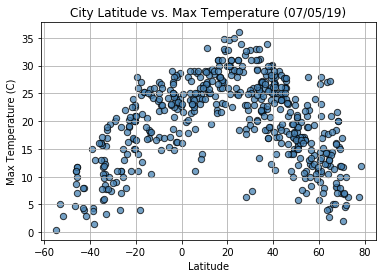

In [189]:
# Build the scatter plots for Latitude vs. Max Temperature
plot_alpha = 0.75 #alpha value
scatter_size = 40 #scatter size multiplier

plt.scatter(x=weather_data['Lat'], y=weather_data['Max Temp'], marker="o", facecolors="steelblue", edgecolors="black",
            s=scatter_size, alpha=plot_alpha)
plt.grid()

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (07/05/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save Figure
plt.savefig('output_data/max_temp.png')

#### Latitude vs. Humidity Plot

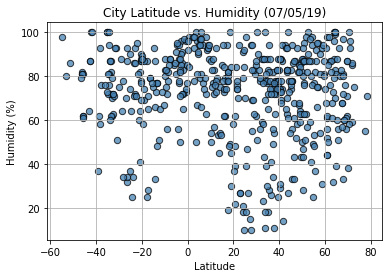

In [190]:
# Build the scatter plots for Latitude vs. Humidity
plot_alpha = 0.75 #alpha value
scatter_size = 40 #scatter size multiplier

plt.scatter(x=weather_data['Lat'], y=weather_data['Humidity'], marker="o", facecolors="steelblue", edgecolors="black",
            s=scatter_size, alpha=plot_alpha)
plt.grid()

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (07/05/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save Figure
plt.savefig('output_data/humidity.png')

#### Latitude vs. Cloudiness Plot

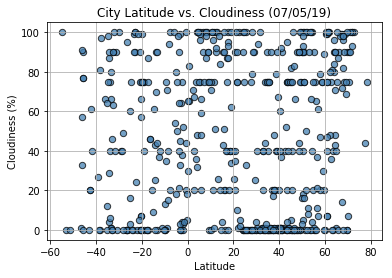

In [191]:
# Build the scatter plots for Latitude vs. Cloudiness
plot_alpha = 0.75 #alpha value
scatter_size = 40 #scatter size multiplier

plt.scatter(x=weather_data['Lat'], y=weather_data['Cloudiness'], marker="o", facecolors="steelblue", edgecolors="black",
            s=scatter_size, alpha=plot_alpha)
plt.grid()

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (07/05/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save Figure
plt.savefig('output_data/cloudiness.png')

#### Latitude vs. Wind Speed Plot

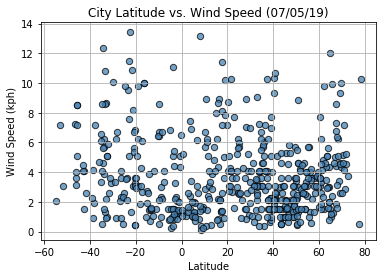

In [192]:
# Build the scatter plots for Latitude vs. Wind Speed
plot_alpha = 0.75 #alpha value
scatter_size = 40 #scatter size multiplier

plt.scatter(x=weather_data['Lat'], y=weather_data['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black",
            s=scatter_size, alpha=plot_alpha)
plt.grid()

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (07/05/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')

# Save Figure
plt.savefig('output_data/wind_speed.png')